# Introduction

A contractor is interested in opening an African Supermarket & Restaurant in Texas and needs my help to determine appropriate location. Factors i will be considering include income of Afican families in the various counties in Texas and existing African supermarkets and restaurants in Texas.

Essentially the supermarket is to be located in a county with medium-high income African population with minimum completion.



### Import required libraries

In [4]:
!pip install folium

import folium

     |████████████████████████████████| 93 kB 3.1 MB/s  eta 0:00:01


In [5]:
!pip install geocoder

import geocoder

     |████████████████████████████████| 98 kB 6.8 MB/s  eta 0:00:01


In [10]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.cluster import KMeans

In [7]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [9]:
import requests
from pandas.io.json import json_normalize
import urllib
import json

import matplotlib.cm as cm
import matplotlib.colors as colors

# Data

Data on MEDIAN HOUSEHOLD INCOME for Texas is in the link below. This data will be used to determine the top 5 countys. using Foursquare location data, these 5 counties will be examined for presence or proximity to existing African stores and restaurants.

"https://datausa.io/api/data?Geography=04000US48:children&measure=Household Income by Race,Household Income by Race Moe&drilldowns=Race"

### Load income data into panda df and wrangle data to filter out 2018 income for African race

In [15]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_031391a8ee7a4649b03f1b115ddb9b75 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='45RGnIiqVp6LXjWeutA8Vl4mD109X70GzZDVpV2bMS-0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_031391a8ee7a4649b03f1b115ddb9b75.get_object(Bucket='courseracapstone-donotdelete-pr-voxclj9awxoaqp',Key='Income by Location.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,ID Race,Race,ID Year,Year,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,Slug Geography
0,0,Total,2018,2018,47519,5773.0,"Angelina County, TX",05000US48005,angelina-county-tx
1,0,Total,2018,2018,69067,13636.0,"Bastrop County, TX",05000US48021,bastrop-county-tx
2,0,Total,2018,2018,54495,2274.0,"Bell County, TX",05000US48027,bell-county-tx
3,0,Total,2018,2018,54149,1409.0,"Bexar County, TX",05000US48029,bexar-county-tx
4,0,Total,2018,2018,47134,4912.0,"Bowie County, TX",05000US48037,bowie-county-tx


In [47]:
df = df_data_1[(df_data_1.Race == "Black")]
df = df[(df.Year == 2018)]
df.head()

,ID Race,Race,ID Year,Year,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,Slug Geography
108,2,Black,2018,2018,30461,5694.0,"Angelina County, TX",05000US48005,angelina-county-tx
109,2,Black,2018,2018,46557,3674.0,"Bell County, TX",05000US48027,bell-county-tx
110,2,Black,2018,2018,44964,4721.0,"Bexar County, TX",05000US48029,bexar-county-tx
111,2,Black,2018,2018,35708,9660.0,"Bowie County, TX",05000US48037,bowie-county-tx
112,2,Black,2018,2018,73810,17246.0,"Brazoria County, TX",05000US48039,brazoria-county-tx


In [48]:
df = df.drop(['Household Income by Race Moe', 'ID Geography', 'Slug Geography', 'ID Year', 'ID Race', 'Year', 'Race'], axis=1).reset_index(drop=True)

In [49]:
df = df.rename({'Household Income by Race': 'Income'}, axis=1)

In [64]:
df = df.sort_values('Income', ascending=False).reset_index(drop=True)
df.head()

,Income,Geography
0,140503,"Comal County, TX"
1,87679,"Montgomery County, TX"
2,76890,"Fort Bend County, TX"
3,73810,"Brazoria County, TX"
4,73731,"Williamson County, TX"


### Visualize data as column chart

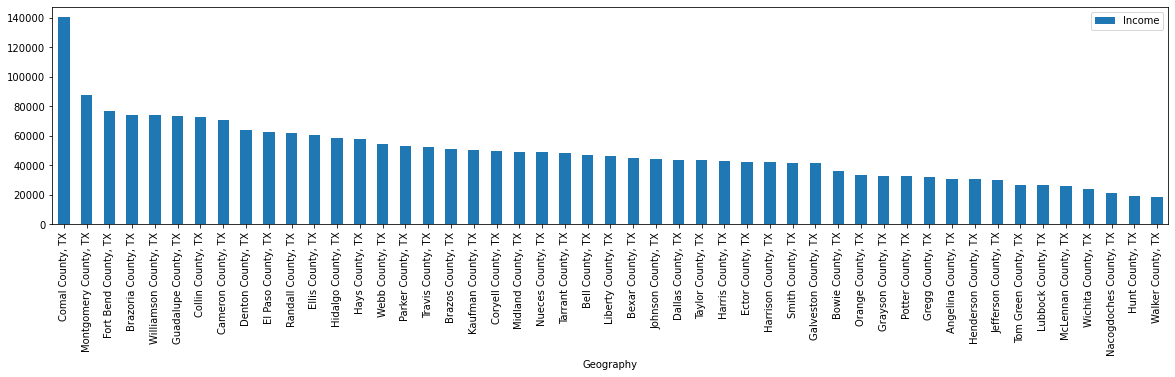

In [78]:
df.plot(x ='Geography', y='Income', kind = 'bar', figsize=(20, 4))

plt.show()

In [73]:
targetdf = df[:5]
targetdf

,Income,Geography
0,140503,"Comal County, TX"
1,87679,"Montgomery County, TX"
2,76890,"Fort Bend County, TX"
3,73810,"Brazoria County, TX"
4,73731,"Williamson County, TX"


### Use geocoder to include latitude and longitude of county

In [74]:
Latitude = []
Longitude = []

lat_lng_coords = None


for i in targetdf['Geography']:
    g = geocoder.arcgis('{}, United States'.format(i))
    lat_lng_coords = g.latlng
    
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    
    Latitude.append(latitude)
    Longitude.append(longitude)

In [75]:
targetdf['latitude'] = Latitude
targetdf['longitude'] = Longitude
targetdf.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Income,Geography,latitude,longitude
0,140503,"Comal County, TX",29.808185,-98.278195
1,87679,"Montgomery County, TX",30.300205,-95.503049
2,76890,"Fort Bend County, TX",29.527454,-95.770645
3,73810,"Brazoria County, TX",29.190968,-95.454786
4,73731,"Williamson County, TX",30.648067,-97.600772


### Insert Map

In [89]:
latitude_can = 28
longitude_can = -95

map_TX = folium.Map(location=[latitude_can, longitude_can], zoom_start = 7)

# adding map markers
for lat, lng, Geo, Income in zip(targetdf['latitude'], targetdf['longitude'], targetdf['Geography'], targetdf['Income']):
    label = '{}, {}'.format(Geo, Income)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 5,
    popup = label,
    color = 'yellow',
    fill = True,
    fill_color = '#3186CC',
    fill_opacity = 0.5,
    parse_html = False).add_to(map_TX)
    
map_TX

### Instantialize Foursquare

In [11]:
CLIENT_ID = 'YFN1TGZMLBVWX3NJO5Z0O02C4ODK5AODANF2LV5VNDKP1VF4' # your Foursquare ID
CLIENT_SECRET = 'UGWXOBPPKFI1ASDZGIJGBDT4GBG21QN3CQR5PSYANCC0WKTB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YFN1TGZMLBVWX3NJO5Z0O02C4ODK5AODANF2LV5VNDKP1VF4
CLIENT_SECRET:UGWXOBPPKFI1ASDZGIJGBDT4GBG21QN3CQR5PSYANCC0WKTB


### Explore Comal County

In [90]:
targetdf.loc[0, 'Geography']

'Comal County, TX'

In [92]:
county_latitude = targetdf.loc[0, 'latitude']
county_longitude = targetdf.loc[0, 'longitude']
county_name = targetdf.loc[0, 'Geography']

print('Latitude and longitude values of {} are {}, {}.'.format(county_name, 
                                                               county_latitude, 
                                                               county_longitude))

Latitude and longitude values of Comal County, TX are 29.808184706000077, -98.27819539699999.


In [105]:
radius = 10000


url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    county_latitude, 
    county_longitude, 
    VERSION, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=YFN1TGZMLBVWX3NJO5Z0O02C4ODK5AODANF2LV5VNDKP1VF4&client_secret=UGWXOBPPKFI1ASDZGIJGBDT4GBG21QN3CQR5PSYANCC0WKTB&ll=29.808184706000077,-98.27819539699999&v=20180605&radius=10000&limit=100'

In [106]:

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5febcaaad358eb7aca88ce83'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 29.898184796000166,
    'lng': -98.17466580849981},
   'sw': {'lat': 29.718184615999988, 'lng': -98.38172498550017}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f1c953ae4b044fd36bc3dbe',
       'name': "Gennaro's Trattoria",
       'location': {'address': '10018 Startz Rd',
        'lat': 29.840160170815782,
        'lng': -98.27390833394044,
        'labeledLatLngs': [{'label': 'display',
          'lat'

In [100]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [107]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Gennaro's Trattoria,Italian Restaurant,29.840160,-98.273908
1,Las Barcas,Mexican Restaurant,29.861418,-98.288919
2,CVS pharmacy,Pharmacy,29.842943,-98.267120
3,Comal County Tacos,Mexican Restaurant,29.804985,-98.370414
4,Dollar General,Discount Store,29.844652,-98.275492


In [108]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


### Explore all 5 counties

In [129]:
def getNearbyVenues(names, latitudes, longitudes, radius=70000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['County', 
                  'County Latitude', 
                  'County Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [130]:
TX_venues = getNearbyVenues(names=targetdf['Geography'],
                                   latitudes=targetdf['latitude'],
                                   longitudes=targetdf['longitude']
                                  )

Comal County, TX
Montgomery County, TX
Fort Bend County, TX
Brazoria County, TX
Williamson County, TX


In [131]:
print(TX_venues.shape)
TX_venues.head()

(500, 7)


,County,County Latitude,County Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Comal County, TX",29.808185,-98.278195,Guadalupe River,29.864585,-98.160399,Surf Spot
1,"Comal County, TX",29.808185,-98.278195,Landa Park,29.710712,-98.135144,Park
2,"Comal County, TX",29.808185,-98.278195,Gruene Hall,29.738411,-98.104320,Beer Garden
3,"Comal County, TX",29.808185,-98.278195,Gristmill River Restaurant & Bar,29.738169,-98.104810,American Restaurant
4,"Comal County, TX",29.808185,-98.278195,TPC San Antonio,29.666371,-98.400958,Golf Course


In [132]:
TX_venues.groupby('County').count()

,County Latitude,County Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
County,,,,,,
"Brazoria County, TX",100,100,100,100,100,100
"Comal County, TX",100,100,100,100,100,100
"Fort Bend County, TX",100,100,100,100,100,100
"Montgomery County, TX",100,100,100,100,100,100
"Williamson County, TX",100,100,100,100,100,100


In [134]:
# one hot encoding
TX_ = pd.get_dummies(TX_venues[['Venue Category']], prefix= "", prefix_sep = "")

# add resort column back to dataframe
TX_['County'] = TX_venues['County']

# move resort to first column
fixed_columns = [TX_.columns[-1]] + list(TX_.columns[:-1])
TX_ = TX_[fixed_columns]
TX_.head()

,County,American Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Garden,Beer Store,Bookstore,Botanical Garden,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Café,Cajun / Creole Restaurant,Camera Store,Campground,Capitol Building,Cheese Shop,Chocolate Shop,Churrascaria,Climbing Gym,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Eye Doctor,Fabric Shop,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Grocery Store,Gym,Health & Beauty Service,Hot Dog Joint,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lingerie Store,Liquor Store,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Music Store,New American Restaurant,Nudist Beach,Outlet Mall,Park,Persian Restaurant,Pie Shop,Pizza Place,Playground,Pub,Record Shop,Restaurant,River,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Trail,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,"Comal County, TX",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Comal County, TX",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Comal County, TX",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Comal County, TX",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Comal County, TX",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
TX_grouped = TX_.groupby('County').mean().reset_index()
TX_grouped

,County,American Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Garden,Beer Store,Bookstore,Botanical Garden,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Café,Cajun / Creole Restaurant,Camera Store,Campground,Capitol Building,Cheese Shop,Chocolate Shop,Churrascaria,Climbing Gym,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Eye Doctor,Fabric Shop,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Grocery Store,Gym,Health & Beauty Service,Hot Dog Joint,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lingerie Store,Liquor Store,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Music Store,New American Restaurant,Nudist Beach,Outlet Mall,Park,Persian Restaurant,Pie Shop,Pizza Place,Playground,Pub,Record Shop,Restaurant,River,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Trail,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,"Brazoria County, TX",0.03,0.01,0.00,0.01,0.02,0.01,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.06,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.02,0.01,0.01,0.00,0.00,0.01,0.01,0.08,0.01,0.00,0.00,0.00,0.04,0.00,0.02,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.03,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.04,0.01,0.00,0.03,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.03,0.01,0.01,0.01,0.01
1,"Comal County, TX",0.04,0.01,0.00,0.00,0.03,0.00,0.03,0.01,0.00,0.03,0.00,0.02,0.00,0.00,0.01,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.06,0.02,0.01,0.01,0.02,0.02,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.01,0.05,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.01,0.03,0.02,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.00
2,"Fort Bend County, TX",0.03,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.06,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.02,0.00,0.09,0.04,0.00,0.00,0.02,0.03,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.06,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.03,0.01,0.01,0.00,0.01,0.00,0.04,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.03,0.00,0.00,0.02,0.01,0.00,0.00
3,"Montgomery County, TX",0.02,0.00,0.00,0.00,0.03,0.00,0.02,0.01,0.00,0.02,0.01,0.00,0.00,0.01,0.00,0.03,0.01,0.04,0.03,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.06,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.10,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.0

In [145]:
num_top_venues = 10

for hood in TX_grouped['County']:
    print("----"+hood+"----")
    temp = TX_grouped[TX_grouped['County'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Brazoria County, TX----
                  venue  freq
0         Grocery Store  0.08
1  Fast Food Restaurant  0.06
2                  Park  0.04
3        Ice Cream Shop  0.04
4              Wine Bar  0.03
5                 Trail  0.03
6           Pizza Place  0.03
7    Mexican Restaurant  0.03
8   American Restaurant  0.03
9                 Beach  0.02


----Comal County, TX----
                  venue  freq
0         Grocery Store  0.06
1           Pizza Place  0.06
2                  Park  0.05
3  Fast Food Restaurant  0.04
4   American Restaurant  0.04
5    Seafood Restaurant  0.03
6         Movie Theater  0.03
7           Beer Garden  0.03
8             BBQ Joint  0.03
9            Steakhouse  0.03


----Fort Bend County, TX----
                  venue  freq
0         Grocery Store  0.09
1                  Park  0.06
2  Fast Food Restaurant  0.06
3            Steakhouse  0.04
4                   Gym  0.04
5                  Café  0.03
6       Warehouse Store  0.03
7         Shop

In [146]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [158]:
um_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['County']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
County_venues_sorted = pd.DataFrame(columns=columns)
County_venues_sorted['County'] = TX_grouped['County']

for ind in np.arange(TX_grouped.shape[0]):
    County_venues_sorted.iloc[ind, 1:] = return_most_common_venues(TX_grouped.iloc[ind, :], num_top_venues)

County_venues_sorted.head()

,County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Brazoria County, TX",Grocery Store,Fast Food Restaurant,Park,Ice Cream Shop,American Restaurant,Trail,Pizza Place,Mexican Restaurant,Wine Bar,Department Store
1,"Comal County, TX",Pizza Place,Grocery Store,Park,American Restaurant,Fast Food Restaurant,Movie Theater,Beer Garden,BBQ Joint,Coffee Shop,Bakery
2,"Fort Bend County, TX",Grocery Store,Fast Food Restaurant,Park,Steakhouse,Gym,Ice Cream Shop,Café,Shopping Mall,American Restaurant,Warehouse Store
3,"Montgomery County, TX",Grocery Store,Fast Food Restaurant,Coffee Shop,Burger Joint,Steakhouse,Café,Gym,BBQ Joint,Trail,Park
4,"Williamson County, TX",Taco Place,Park,Pizza Place,Coffee Shop,BBQ Joint,Movie Theater,Sandwich Place,Brewery,Grocery Store,American Restaurant


### K Means Clustering

In [159]:

# set number of clusters
kclusters = 3

TX_grouped_clustering = TX_grouped.drop('County', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(TX_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 1, 0, 2], dtype=int32)

In [160]:

# add clustering labels
County_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

TX_merged = targetdf


TX_merged = TX_merged.join(County_venues_sorted.set_index('County'), on='Geography')

TX_merged.head() 

,Income,Geography,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,140503,"Comal County, TX",29.808185,-98.278195,2,Pizza Place,Grocery Store,Park,American Restaurant,Fast Food Restaurant,Movie Theater,Beer Garden,BBQ Joint,Coffee Shop,Bakery
1,87679,"Montgomery County, TX",30.300205,-95.503049,0,Grocery Store,Fast Food Restaurant,Coffee Shop,Burger Joint,Steakhouse,Café,Gym,BBQ Joint,Trail,Park
2,76890,"Fort Bend County, TX",29.527454,-95.770645,1,Grocery Store,Fast Food Restaurant,Park,Steakhouse,Gym,Ice Cream Shop,Café,Shopping Mall,American Restaurant,Warehouse Store
3,73810,"Brazoria County, TX",29.190968,-95.454786,1,Grocery Store,Fast Food Restaurant,Park,Ice Cream Shop,American Restaurant,Trail,Pizza Place,Mexican Restaurant,Wine Bar,Department Store
4,73731,"Williamson County, TX",30.648067,-97.600772,2,Taco Place,Park,Pizza Place,Coffee Shop,BBQ Joint,Movie Theater,Sandwich Place,Brewery,Grocery Store,American Restaurant


In [161]:
TX_merged.shape

(5, 15)

In [163]:
# create map
map_clusters = folium.Map(location=[28, -95], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(TX_merged['latitude'], TX_merged['longitude'], TX_merged['Geography'], TX_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Conclusion

Based on the venue data available on FOursquare, no African store is present in any of the top 5 high income Counties. We recommenr our investor to proceed with the investment decision for the 2 top counties. 

In addition we also recommend our investor to consider a Steakhouse alsi in Comal county due to the popularity in other counties.

Finally we also recomment an "American Restaurant" in Montgomery county since its is the only county out of the top 5 without one.
